In [1]:
token = 'cb25867a53d723d058c6d15d29d416fc981bfe92d68e1709ae61ae0157806312'
token

'cb25867a53d723d058c6d15d29d416fc981bfe92d68e1709ae61ae0157806312'

In [2]:
# url para llamar a la API de E-SIOS
url = 'https://api.esios.ree.es/indicators'

In [1]:
# paquetes para importar
import requests
import json
import numpy as np
import datetime
import string
import pandas as pd
import matplotlib.pyplot as plt

## 1) Datos Mensuales

### Versión 1: datos mensuales tal cual

In [4]:
# mensual llamando a la api
start_date='01-01-2014T00:00:00 00:00'
end_date='31-12-2021T23:00:00 00:00'
date_type='datos'

url_resumen = 'https://api.esios.ree.es/indicators/1293/?start_date='+start_date+'&end_date='+end_date+'&time_trunc=month'
demanda_historico_mensual = requests.get(
    url_resumen, 
    headers = {
        'Accept': 'application/json; application/vnd.esios-api-v1+json',
        'Host' : 'api.esios.ree.es',
        'Content-Type':'application/json',
        'Authorization':'Token token="%s"' % (token),
        'Cookie': ''
    }
)

demanda_historico_mensual.json()

{'indicator': {'name': 'Demanda real',
  'short_name': 'Demanda real',
  'id': 1293,
  'composited': False,
  'step_type': 'linear',
  'disaggregated': False,
  'magnitud': [{'name': 'Potencia', 'id': 20}],
  'tiempo': [{'name': 'Diez minutos', 'id': 225}],
  'geos': [{'geo_id': 8741, 'geo_name': 'Península'}],
  'values_updated_at': '2021-12-31T23:09:00.000+01:00',
  'values': [{'value': 132056990.0,
    'datetime': '2014-01-01T00:00:00.000+01:00',
    'datetime_utc': '2013-12-31T23:00:00Z',
    'tz_time': '2013-12-31T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 121688438.0,
    'datetime': '2014-02-01T00:00:00.000+01:00',
    'datetime_utc': '2014-01-31T23:00:00Z',
    'tz_time': '2014-01-31T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 124724746.0,
    'datetime': '2014-03-01T00:00:00.000+01:00',
    'datetime_utc': '2014-02-28T23:00:00Z',
    'tz_time': '2014-02-28T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name':

In [5]:
value=[]
date_record=[]
# hour=[]
for demanda_value in demanda_historico_mensual.json()['indicator']['values']:
    value.append(demanda_value['value'])
    date_record.append(demanda_value['datetime'][:10])

In [6]:
demanda_dataframe_month = pd.DataFrame({
    'date':date_record, 
    'value':value   
})

In [7]:
demanda_dataframe_month.head()

,date,value
0,2014-01-01,132056990.0
1,2014-02-01,121688438.0
2,2014-03-01,124724746.0
3,2014-04-01,112057243.0
4,2014-05-01,116035410.0


In [8]:
demanda_dataframe_month.to_csv(r'demanda_electrica_month.csv', index=False)

In [9]:
demanda_dataframe_month = pd.read_csv('demanda_electrica_month.csv')
demanda_dataframe_month.head()

,date,value
0,2014-01-01,132056990.0
1,2014-02-01,121688438.0
2,2014-03-01,124724746.0
3,2014-04-01,112057243.0
4,2014-05-01,116035410.0


## 2) Datos Horarios

### Versión 1: datos horarios tal cual

In [10]:
# mensual llamando a la api
start_date='01-01-2014T00:00:00 00:00'
end_date='31-12-2021T23:00:00 00:00'
date_type='datos'

url_resumen = 'https://api.esios.ree.es/indicators/1293/?start_date='+start_date+'&end_date='+end_date+'&time_trunc=hour'
demanda_historico_horario = requests.get(
    url_resumen, 
    headers = {
        'Accept': 'application/json; application/vnd.esios-api-v1+json',
        'Host' : 'api.esios.ree.es',
        'Content-Type':'application/json',
        'Authorization':'Token token="%s"' % (token),
        'Cookie': ''
    }
)

demanda_historico_horario.json()

{'indicator': {'name': 'Demanda real',
  'short_name': 'Demanda real',
  'id': 1293,
  'composited': False,
  'step_type': 'linear',
  'disaggregated': False,
  'magnitud': [{'name': 'Potencia', 'id': 20}],
  'tiempo': [{'name': 'Diez minutos', 'id': 225}],
  'geos': [{'geo_id': 8741, 'geo_name': 'Península'}],
  'values_updated_at': '2021-12-31T23:09:00.000+01:00',
  'values': [{'value': 145810.0,
    'datetime': '2014-01-01T00:00:00.000+01:00',
    'datetime_utc': '2013-12-31T23:00:00Z',
    'tz_time': '2013-12-31T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 140192.0,
    'datetime': '2014-01-01T01:00:00.000+01:00',
    'datetime_utc': '2014-01-01T00:00:00Z',
    'tz_time': '2014-01-01T00:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 130035.0,
    'datetime': '2014-01-01T02:00:00.000+01:00',
    'datetime_utc': '2014-01-01T01:00:00Z',
    'tz_time': '2014-01-01T01:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Penínsu

In [11]:
value=[]
date_record=[]
hour=[]
for demanda_value in demanda_historico_horario.json()['indicator']['values']:
    value.append(demanda_value['value'])
    date_record.append(demanda_value['datetime'][:10])
    hour.append(demanda_value['datetime'][11:13])

In [12]:
demanda_dataframe_hour = pd.DataFrame({
    'date':date_record, 
    'hour': hour,
    'value':value   
})

In [13]:
demanda_dataframe_hour.head()

,date,hour,value
0,2014-01-01,00,145810.0
1,2014-01-01,01,140192.0
2,2014-01-01,02,130035.0
3,2014-01-01,03,121152.0
4,2014-01-01,04,115324.0


In [14]:
demanda_dataframe_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    70128 non-null  object 
 1   hour    70128 non-null  object 
 2   value   70128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [15]:
demanda_dataframe_hour.to_csv(r'demanda_electrica_hora.csv', index=False)

In [16]:
demanda_dataframe_hour = pd.read_csv('demanda_electrica_hora.csv')

In [17]:
demanda_dataframe_hour.head()

,date,hour,value
0,2014-01-01,0,145810.0
1,2014-01-01,1,140192.0
2,2014-01-01,2,130035.0
3,2014-01-01,3,121152.0
4,2014-01-01,4,115324.0


### Versión 2: con día de la semana y festivo

### a) Día de la semana:

Vamos a añadir una nueva columna `weekday` en el que va a haber un valor según el día: Lunes=0, ..., Domingo=6.

In [18]:
demanda_hour_v2 = pd.read_csv('demanda_electrica_hora.csv')

In [19]:
demanda_hour_v2['weekday'] = pd.to_datetime(demanda_hour_v2['date']).apply(lambda x: x.weekday())

In [20]:
demanda_hour_v2.head()

,date,hour,value,weekday
0,2014-01-01,0,145810.0,2
1,2014-01-01,1,140192.0,2
2,2014-01-01,2,130035.0,2
3,2014-01-01,3,121152.0,2
4,2014-01-01,4,115324.0,2


### b) Día laboral o festivo

In [21]:
demanda_hour_v2.weekday.unique()

array([2, 3, 4, 5, 6, 0, 1])

Comprobamos que los días de la semana van del 0 (lunes) al 6 (domingo).

Creamos una función para determinar si es sábado/domingo (0) o lunes-viernes (1):

In [14]:
# if weekday is 5 or 6 (Saturday or Sunday) is not working day, else working day:
def is_working_day(day):
    if day == 5 or day == 6:
        return 0
    else:
        return 1

In [23]:
demanda_hour_v2['working_day'] = demanda_hour_v2['weekday'].apply(is_working_day)

In [24]:
demanda_hour_v2.working_day.unique()

array([1, 0])

In [25]:
demanda_hour_v2.loc[demanda_hour_v2['date'] == '2014-08-15']

,date,hour,value,weekday,working_day
5423,2014-08-15,0,151159.0,4,1
5424,2014-08-15,1,141692.0,4,1
5425,2014-08-15,2,133955.0,4,1
5426,2014-08-15,3,129741.0,4,1
5427,2014-08-15,4,127019.0,4,1
5428,2014-08-15,5,125050.0,4,1
5429,2014-08-15,6,125591.0,4,1
5430,2014-08-15,7,124808.0,4,1
5431,2014-08-15,8,126699.0,4,1
5432,2014-08-15,9,135823.0,4,1


In [26]:
demanda_hour_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70128 non-null  object 
 1   hour         70128 non-null  int64  
 2   value        70128 non-null  float64
 3   weekday      70128 non-null  int64  
 4   working_day  70128 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.7+ MB


In [27]:
demanda_hour_v2.head()

,date,hour,value,weekday,working_day
0,2014-01-01,0,145810.0,2,1
1,2014-01-01,1,140192.0,2,1
2,2014-01-01,2,130035.0,2,1
3,2014-01-01,3,121152.0,2,1
4,2014-01-01,4,115324.0,2,1


Buscamos los festivos de cada año entre 2014 y 2021 y los concatenamos después:

In [19]:
festives_spain_2014 = [
    '2014-01-01', '2014-01-06', '2014-04-17', '2014-04-18', '2014-05-01', 
    '2014-06-19', '2014-08-15', '2014-11-01', '2014-12-06', '2014-12-08', '2014-12-25'
]

In [20]:
festives_spain_2015 = [
    '2015-01-01', '2015-01-06', '2015-04-02', '2015-04-03',
    '2015-05-01', '2015-10-12', '2015-11-01', 
    '2015-12-06', '2015-12-08', '2015-12-25'
]

In [21]:
festives_spain_2016 = [
    '2016-01-01', '2016-01-06', '2016-03-24', '2016-03-25',
    '2016-05-01', '2016-08-15', '2016-10-12', 
    '2016-11-01', '2016-12-06', '2016-12-08',
    '2016-12-25'
]

In [22]:
festives_spain_2017 = [
    '2017-01-01', '2017-01-06', '2017-04-13', '2017-04-14', '2017-05-01',
    '2017-08-15', '2017-10-12', '2017-11-01', '2017-12-06',
    '2017-12-08', '2017-12-25'
]

In [23]:
festives_spain_2018 = [
    '2018-01-01', '2018-01-06', '2018-03-29', '2018-03-30', '2018-05-01',
    '2018-08-15', '2018-10-12', '2018-11-01', '2018-12-06',
    '2018-12-08', '2018-12-25'
]

In [24]:
festives_spain_2019 = [
    '2019-01-01', '2019-01-06', '2019-04-18', '2019-04-19',
    '2019-05-01', '2019-08-15', '2019-10-12', '2019-11-01',
    '2019-12-06', '2019-12-08', '2019-12-25'
]

In [25]:
festives_spain_2020 = [
    '2020-01-01', '2020-01-06', '2020-04-09', '2020-04-10',
    '2020-05-01', '2020-08-15', '2020-10-12', '2020-11-01',
    '2020-12-06', '2020-12-08', '2020-12-25'
]

In [26]:
festives_spain_2021 = [
    '2021-01-01', '2021-01-06', '2021-04-01', '2021-04-02',
    '2021-05-01', '2021-08-15', '2021-10-12', '2021-11-01',
    '2021-12-06', '2021-12-08', '2021-12-25'
]

In [27]:
festives_spain_2014_2021 = festives_spain_2014 + festives_spain_2015 + festives_spain_2016 + festives_spain_2017 + festives_spain_2018 + festives_spain_2019 + festives_spain_2020 + festives_spain_2021

In [17]:
def is_national_festive(date):
    if date in festives_spain_2014_2021:
        return 0
    else:
        return 1

In [38]:
demanda_hour_v2['working_day'] = demanda_hour_v2['date'].apply(is_national_festive)

Comprobamos que el día festivo que usamos como referencia, ahora figura como día festivo:

In [39]:
demanda_hour_v2.loc[demanda_hour_v2['date'] == '2014-08-15']

,date,hour,value,weekday,working_day
5423,2014-08-15,0,151159.0,4,0
5424,2014-08-15,1,141692.0,4,0
5425,2014-08-15,2,133955.0,4,0
5426,2014-08-15,3,129741.0,4,0
5427,2014-08-15,4,127019.0,4,0
5428,2014-08-15,5,125050.0,4,0
5429,2014-08-15,6,125591.0,4,0
5430,2014-08-15,7,124808.0,4,0
5431,2014-08-15,8,126699.0,4,0
5432,2014-08-15,9,135823.0,4,0


In [40]:
demanda_hour_v2.to_csv(r'demanda_electrica_hora_weekday.csv', index=False)

In [41]:
demanda_hour_v2 = pd.read_csv('demanda_electrica_hora_weekday.csv')

In [42]:
demanda_hour_v2.head()

,date,hour,value,weekday,working_day
0,2014-01-01,0,145810.0,2,0
1,2014-01-01,1,140192.0,2,0
2,2014-01-01,2,130035.0,2,0
3,2014-01-01,3,121152.0,2,0
4,2014-01-01,4,115324.0,2,0


In [43]:
# extraemos una semana

In [44]:
# demanda_hour_v2_test_week = demanda_hour_v2.loc[demanda_hour_v2['date'] == '2014-01-01']
demanda_hour_v2_test_week = demanda_hour_v2.loc[
    demanda_hour_v2['date'].isin([
        '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04', 
        '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08'
    ])
]
demanda_hour_v2_test_week

,date,hour,value,weekday,working_day
0,2014-01-01,0,145810.0,2,0
1,2014-01-01,1,140192.0,2,0
2,2014-01-01,2,130035.0,2,0
3,2014-01-01,3,121152.0,2,0
4,2014-01-01,4,115324.0,2,0
...,...,...,...,...,...
187,2014-01-08,19,214267.0,2,1
188,2014-01-08,20,214905.0,2,1
189,2014-01-08,21,210905.0,2,1
190,2014-01-08,22,195654.0,2,1


In [45]:
demanda_hour_v2_test_week['date'] = pd.to_datetime(demanda_hour_v2_test_week.date) + pd.to_timedelta(demanda_hour_v2_test_week.hour, unit='h')
del demanda_hour_v2_test_week['hour']
demanda_hour_v2_test_week

/tmp/ipykernel_24179/3358090918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demanda_hour_v2_test_week['date'] = pd.to_datetime(demanda_hour_v2_test_week.date) + pd.to_timedelta(demanda_hour_v2_test_week.hour, unit='h')


,date,value,weekday,working_day
0,2014-01-01 00:00:00,145810.0,2,0
1,2014-01-01 01:00:00,140192.0,2,0
2,2014-01-01 02:00:00,130035.0,2,0
3,2014-01-01 03:00:00,121152.0,2,0
4,2014-01-01 04:00:00,115324.0,2,0
...,...,...,...,...
187,2014-01-08 19:00:00,214267.0,2,1
188,2014-01-08 20:00:00,214905.0,2,1
189,2014-01-08 21:00:00,210905.0,2,1
190,2014-01-08 22:00:00,195654.0,2,1


In [46]:
demanda_hour_v2_test_week.set_index("date", inplace=True)
demanda_hour_v2_test_week.head(2)

,value,weekday,working_day
date,,,
2014-01-01 00:00:00,145810.0,2,0
2014-01-01 01:00:00,140192.0,2,0


In [47]:
demanda_hour_v2_test_week = demanda_hour_v2_test_week.resample('H').first()

In [48]:
demanda_hour_v2_test_week.index.freq

<Hour>

In [49]:
demanda_hour_v2_test_week.index

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-01-08 14:00:00', '2014-01-08 15:00:00',
               '2014-01-08 16:00:00', '2014-01-08 17:00:00',
               '2014-01-08 18:00:00', '2014-01-08 19:00:00',
               '2014-01-08 20:00:00', '2014-01-08 21:00:00',
               '2014-01-08 22:00:00', '2014-01-08 23:00:00'],
              dtype='datetime64[ns]', name='date', length=192, freq='H')

<AxesSubplot:xlabel='date'>

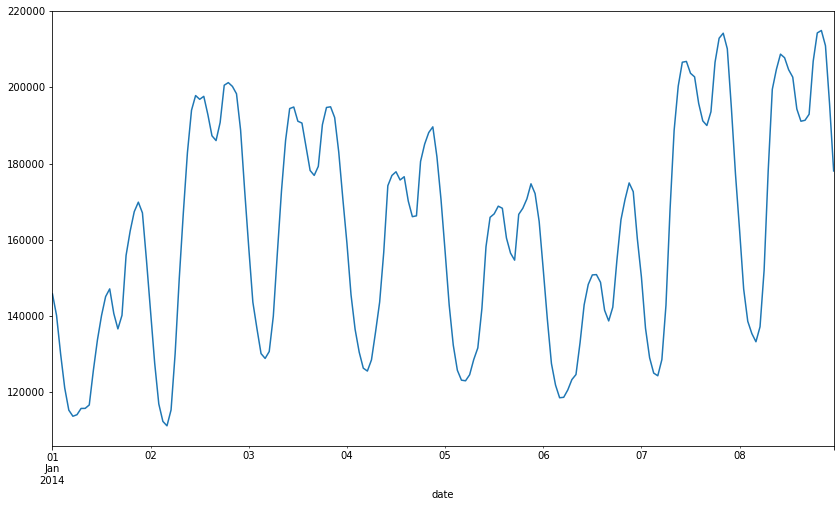

In [50]:
demanda_hour_v2_test_week['value'].plot(figsize=(14,8))

## 3) Datos Diarios

In [91]:
# mensual llamando a la api
start_date='01-01-2014T00:00:00 00:00'
end_date='31-12-2021T23:00:00 00:00'
date_type='datos'

url_resumen = 'https://api.esios.ree.es/indicators/1293/?start_date='+start_date+'&end_date='+end_date+'&time_trunc=day'
demanda_historico_diario = requests.get(
    url_resumen, 
    headers = {
        'Accept': 'application/json; application/vnd.esios-api-v1+json',
        'Host' : 'api.esios.ree.es',
        'Content-Type':'application/json',
        'Authorization':'Token token="%s"' % (token),
        'Cookie': ''
    }
)

demanda_historico_diario.json()

{'indicator': {'name': 'Demanda real',
  'short_name': 'Demanda real',
  'id': 1293,
  'composited': False,
  'step_type': 'linear',
  'disaggregated': False,
  'magnitud': [{'name': 'Potencia', 'id': 20}],
  'tiempo': [{'name': 'Diez minutos', 'id': 225}],
  'geos': [{'geo_id': 8741, 'geo_name': 'Península'}],
  'values_updated_at': '2021-12-31T23:09:00.000+01:00',
  'values': [{'value': 3315035.0,
    'datetime': '2014-01-01T00:00:00.000+01:00',
    'datetime_utc': '2013-12-31T23:00:00Z',
    'tz_time': '2013-12-31T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 4059590.0,
    'datetime': '2014-01-02T00:00:00.000+01:00',
    'datetime_utc': '2014-01-01T23:00:00Z',
    'tz_time': '2014-01-01T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 4098986.0,
    'datetime': '2014-01-03T00:00:00.000+01:00',
    'datetime_utc': '2014-01-02T23:00:00Z',
    'tz_time': '2014-01-02T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Pení

In [92]:
value=[]
date_record=[]
for demanda_value in demanda_historico_diario.json()['indicator']['values']:
    value.append(demanda_value['value'])
    date_record.append(demanda_value['datetime'][:10])

In [93]:
demanda_dataframe_day = pd.DataFrame({
    'date':date_record, 
    'value':value   
})

In [94]:
demanda_dataframe_day.head()

,date,value
0,2014-01-01,3315035.0
1,2014-01-02,4059590.0
2,2014-01-03,4098986.0
3,2014-01-04,3867911.0
4,2014-01-05,3648038.0


In [95]:
demanda_dataframe_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2922 non-null   object 
 1   value   2922 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.8+ KB


In [96]:
demanda_dataframe_day.to_csv(r'demanda_electrica_diaria.csv', index=False)

demanda_dataframe_day = pd.read_csv('demanda_electrica_diaria.csv')

demanda_dataframe_day.head()

,date,value
0,2014-01-01,3315035.0
1,2014-01-02,4059590.0
2,2014-01-03,4098986.0
3,2014-01-04,3867911.0
4,2014-01-05,3648038.0


In [97]:
demanda_dataframe_day['weekday'] = pd.to_datetime(demanda_dataframe_day['date']).apply(lambda x: x.weekday())

In [98]:
demanda_dataframe_day['working_day'] = demanda_dataframe_day['weekday'].apply(is_working_day)

In [99]:
demanda_dataframe_day['working_day'] = demanda_dataframe_day['date'].apply(is_national_festive)

In [73]:
# demanda_dataframe_day.to_csv(r'demanda_electrica_diaria.csv', index=False)

demanda_dataframe_day = pd.read_csv('demanda_electrica_diaria.csv')

demanda_dataframe_day

,date,value,weekday,working_day
0,2014-01-01,3315035.0,2,0
1,2014-01-02,4059590.0,3,1
2,2014-01-03,4098986.0,4,1
3,2014-01-04,3867911.0,5,1
4,2014-01-05,3648038.0,6,1
...,...,...,...,...
2917,2021-12-27,3686647.0,0,1
2918,2021-12-28,3729169.0,1,1
2919,2021-12-29,3692921.0,2,1
2920,2021-12-30,3689439.0,3,1


In [101]:
demanda_dataframe_day.set_index("date", inplace=True)
demanda_dataframe_day.head(2)

,value,weekday,working_day
date,,,
2014-01-01,3315035.0,2,0
2014-01-02,4059590.0,3,1


In [102]:
# demanda_dataframe_day = demanda_dataframe_day.resample('D').first()

In [103]:
demanda_dataframe_day.index

Index(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
       '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
       ...
       '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
       '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31'],
      dtype='object', name='date', length=2922)

In [105]:
# demanda_dataframe_day.index.freq
demanda_dataframe_day.index.freq = 'D'

In [106]:
demanda_dataframe_day.index.freq

'D'

In [107]:
demanda_dataframe_day.head()

,value,weekday,working_day
date,,,
2014-01-01,3315035.0,2,0
2014-01-02,4059590.0,3,1
2014-01-03,4098986.0,4,1
2014-01-04,3867911.0,5,1
2014-01-05,3648038.0,6,1


## 4) Temperatura y Precios

### a) Hora

In [56]:
data_prices_temp = pd.read_csv('data_prices_temp.csv')
data_prices_temp

,date,hour,value,weekday,working_day,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp
0,2014/04/01,0,92.75,1,1,6.93180,10.72770,12.90347,13.18472,11.11930
1,2014/04/01,1,86.46,1,1,6.22500,10.48672,12.94668,13.17422,10.26528
2,2014/04/01,2,78.82,1,1,6.36930,10.27407,12.83950,13.30044,9.36490
3,2014/04/01,3,77.47,1,1,6.54214,9.92593,12.53115,13.32388,8.63247
4,2014/04/01,4,76.90,1,1,6.66910,9.79630,12.17030,13.25796,8.16445
...,...,...,...,...,...,...,...,...,...,...
69379,2022/02/28,19,496.98,0,1,12.50210,10.57730,13.41200,17.05532,12.37148
69380,2022/02/28,20,527.63,0,1,10.96010,10.00160,10.66055,15.38467,11.31730
69381,2022/02/28,21,501.97,0,1,9.48380,9.52505,9.47500,13.25698,10.29922
69382,2022/02/28,22,388.23,0,1,8.09610,8.93716,9.06484,12.03090,9.78700


In [57]:
# cambiar las fechas de formato: '/' por '-' ---> OK
# 'value' por 'price'                        ---> OK
# eliminar 'weekday' y 'working_day' ---> OK
# eliminar año 2022                  ---> OK
# mergear con datasets de demanda

In [58]:
data_prices_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69384 entries, 0 to 69383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            69384 non-null  object 
 1   hour            69384 non-null  int64  
 2   value           69384 non-null  float64
 3   weekday         69384 non-null  int64  
 4   working_day     69384 non-null  int64  
 5   madrid_temp     69384 non-null  float64
 6   barcelona_temp  69384 non-null  float64
 7   bilbao_temp     69384 non-null  float64
 8   sevilla_temp    69384 non-null  float64
 9   valencia_temp   69384 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 5.3+ MB


In [59]:
# cambiar las fechas de formato: '/' por '-'
data_prices_temp['date'] = data_prices_temp.date.apply(lambda x: x.replace('/', '-'))

In [60]:
# 'value' por 'price'
data_prices_temp.rename(columns = {'value': 'price'}, inplace=True)

In [61]:
# eliminar 'weekday' y 'working_day'
del data_prices_temp['weekday']
del data_prices_temp['working_day']

In [62]:
# eliminar año 2014 por no estar completo (los precios solo a partir del 2014-04-01)
data_prices_temp = data_prices_temp[~data_prices_temp.date.str.contains("2014")]
# eliminar año 2022
data_prices_temp = data_prices_temp[~data_prices_temp.date.str.contains("2022")]

In [63]:
data_prices_temp

,date,hour,price,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp
6601,2015-01-01,0,127.55,-2.01084,4.05360,1.79458,3.02432,4.22230
6602,2015-01-01,1,130.03,-1.99497,4.25552,0.97402,2.48160,4.55410
6603,2015-01-01,2,133.62,-2.01206,4.87270,0.42324,2.10560,4.87783
6604,2015-01-01,3,127.77,-1.79404,4.92617,0.04507,1.88687,5.18008
6605,2015-01-01,4,123.72,-1.55480,5.27432,-0.01720,1.79385,5.84340
...,...,...,...,...,...,...,...,...
67963,2021-12-31,19,270.54,10.30093,12.26284,14.35660,15.29458,11.10366
67964,2021-12-31,20,261.40,8.57046,10.93252,13.66200,14.34243,10.22744
67965,2021-12-31,21,252.43,6.50552,8.92324,13.27188,13.52260,8.85928
67966,2021-12-31,22,200.33,5.05728,7.83267,12.96035,12.72183,7.82876


In [64]:
data_prices_temp.to_csv(r'data_prices_temp_hourly.csv', index=False)

data_prices_temp_hourly = pd.read_csv('data_prices_temp_hourly.csv')
data_prices_temp_hourly

,date,hour,price,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp
0,2015-01-01,0,127.55,-2.01084,4.05360,1.79458,3.02432,4.22230
1,2015-01-01,1,130.03,-1.99497,4.25552,0.97402,2.48160,4.55410
2,2015-01-01,2,133.62,-2.01206,4.87270,0.42324,2.10560,4.87783
3,2015-01-01,3,127.77,-1.79404,4.92617,0.04507,1.88687,5.18008
4,2015-01-01,4,123.72,-1.55480,5.27432,-0.01720,1.79385,5.84340
...,...,...,...,...,...,...,...,...
61362,2021-12-31,19,270.54,10.30093,12.26284,14.35660,15.29458,11.10366
61363,2021-12-31,20,261.40,8.57046,10.93252,13.66200,14.34243,10.22744
61364,2021-12-31,21,252.43,6.50552,8.92324,13.27188,13.52260,8.85928
61365,2021-12-31,22,200.33,5.05728,7.83267,12.96035,12.72183,7.82876


In [65]:
demanda_hour_v2 = pd.read_csv('demanda_electrica_hora_weekday.csv')
demanda_hour_v2

,date,hour,value,weekday,working_day
0,2014-01-01,0,145810.0,2,0
1,2014-01-01,1,140192.0,2,0
2,2014-01-01,2,130035.0,2,0
3,2014-01-01,3,121152.0,2,0
4,2014-01-01,4,115324.0,2,0
...,...,...,...,...,...
70123,2021-12-31,19,167097.0,4,1
70124,2021-12-31,20,165919.0,4,1
70125,2021-12-31,21,160479.0,4,1
70126,2021-12-31,22,143716.0,4,1


In [66]:
# mergeamos por 'date' y 'hour'
demanda_hour_v2_resume = pd.merge(data_prices_temp_hourly, demanda_hour_v2, how='inner', on=['date', 'hour'])
demanda_hour_v2_resume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61380 entries, 0 to 61379
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            61380 non-null  object 
 1   hour            61380 non-null  int64  
 2   price           61380 non-null  float64
 3   madrid_temp     61380 non-null  float64
 4   barcelona_temp  61380 non-null  float64
 5   bilbao_temp     61380 non-null  float64
 6   sevilla_temp    61380 non-null  float64
 7   valencia_temp   61380 non-null  float64
 8   value           61380 non-null  float64
 9   weekday         61380 non-null  int64  
 10  working_day     61380 non-null  int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 5.6+ MB


In [67]:
demanda_hour_v2_resume

,date,hour,price,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp,value,weekday,working_day
0,2015-01-01,0,127.55,-2.01084,4.05360,1.79458,3.02432,4.22230,152610.0,3,0
1,2015-01-01,1,130.03,-1.99497,4.25552,0.97402,2.48160,4.55410,147069.0,3,0
2,2015-01-01,2,133.62,-2.01206,4.87270,0.42324,2.10560,4.87783,137197.0,3,0
3,2015-01-01,3,127.77,-1.79404,4.92617,0.04507,1.88687,5.18008,128357.0,3,0
4,2015-01-01,4,123.72,-1.55480,5.27432,-0.01720,1.79385,5.84340,121918.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
61375,2021-12-31,19,270.54,10.30093,12.26284,14.35660,15.29458,11.10366,167097.0,4,1
61376,2021-12-31,20,261.40,8.57046,10.93252,13.66200,14.34243,10.22744,165919.0,4,1
61377,2021-12-31,21,252.43,6.50552,8.92324,13.27188,13.52260,8.85928,160479.0,4,1
61378,2021-12-31,22,200.33,5.05728,7.83267,12.96035,12.72183,7.82876,143716.0,4,1


In [68]:
demanda_hour_v2_resume.to_csv(r'demanda_hour_v2_resume.csv', index=False)

demanda_hour_v2_resume = pd.read_csv('demanda_hour_v2_resume.csv')
demanda_hour_v2_resume

,date,hour,price,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp,value,weekday,working_day
0,2015-01-01,0,127.55,-2.01084,4.05360,1.79458,3.02432,4.22230,152610.0,3,0
1,2015-01-01,1,130.03,-1.99497,4.25552,0.97402,2.48160,4.55410,147069.0,3,0
2,2015-01-01,2,133.62,-2.01206,4.87270,0.42324,2.10560,4.87783,137197.0,3,0
3,2015-01-01,3,127.77,-1.79404,4.92617,0.04507,1.88687,5.18008,128357.0,3,0
4,2015-01-01,4,123.72,-1.55480,5.27432,-0.01720,1.79385,5.84340,121918.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
61375,2021-12-31,19,270.54,10.30093,12.26284,14.35660,15.29458,11.10366,167097.0,4,1
61376,2021-12-31,20,261.40,8.57046,10.93252,13.66200,14.34243,10.22744,165919.0,4,1
61377,2021-12-31,21,252.43,6.50552,8.92324,13.27188,13.52260,8.85928,160479.0,4,1
61378,2021-12-31,22,200.33,5.05728,7.83267,12.96035,12.72183,7.82876,143716.0,4,1


### b) Día

In [ ]:
# coger el dataframe anterior por horas con todos los datos
## calcular la media de todos los campos excepto value (demanda, week_day, working_day)
## mergear con el dataframe de datos diarios

In [81]:
demanda_day_resume = demanda_hour_v2_resume.groupby(['date']).mean()

del demanda_day_resume['hour']
del demanda_day_resume['weekday']
del demanda_day_resume['working_day']
del demanda_day_resume['value']

demanda_day_resume

,price,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp
date,,,,,,
2015-01-01,126.205417,2.302056,6.450240,4.552585,7.508438,8.236675
2015-01-02,131.809167,2.247817,6.822769,6.533707,8.941848,8.082912
2015-01-03,127.620417,3.306431,8.111089,7.590906,9.615962,10.276901
2015-01-04,116.906250,4.076339,9.198217,8.215245,9.613794,10.841140
2015-01-05,136.707500,4.725254,8.139022,7.389581,8.404291,8.960415
...,...,...,...,...,...,...
2021-12-27,152.595417,11.606002,13.531011,14.285517,17.009720,17.443636
2021-12-28,155.149583,9.792129,14.261092,14.133620,16.015375,16.007968
2021-12-29,247.747500,8.401157,13.250848,12.936356,13.320164,15.173263


In [82]:
demanda_dataframe_day = pd.read_csv('demanda_electrica_diaria.csv')

demanda_dataframe_day

,date,value,weekday,working_day
0,2014-01-01,3315035.0,2,0
1,2014-01-02,4059590.0,3,1
2,2014-01-03,4098986.0,4,1
3,2014-01-04,3867911.0,5,1
4,2014-01-05,3648038.0,6,1
...,...,...,...,...
2917,2021-12-27,3686647.0,0,1
2918,2021-12-28,3729169.0,1,1
2919,2021-12-29,3692921.0,2,1
2920,2021-12-30,3689439.0,3,1


In [83]:
demanda_day_resume_total = pd.merge(demanda_day_resume, demanda_dataframe_day, how='inner', on='date')
demanda_day_resume_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2557 entries, 0 to 2556
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2557 non-null   object 
 1   price           2557 non-null   float64
 2   madrid_temp     2557 non-null   float64
 3   barcelona_temp  2557 non-null   float64
 4   bilbao_temp     2557 non-null   float64
 5   sevilla_temp    2557 non-null   float64
 6   valencia_temp   2557 non-null   float64
 7   value           2557 non-null   float64
 8   weekday         2557 non-null   int64  
 9   working_day     2557 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 219.7+ KB


In [85]:
cols = ['date', 'value', 'price', 
        'weekday', 'working_day', 'madrid_temp', 
        'barcelona_temp', 'bilbao_temp', 'sevilla_temp', 'valencia_temp']

demanda_day_resume_total = demanda_day_resume_total[cols]

In [86]:
demanda_day_resume_total.to_csv(r'demanda_day_resume_total.csv', index=False)

demanda_day_resume_total = pd.read_csv('demanda_day_resume_total.csv')
demanda_day_resume_total

,date,value,price,weekday,working_day,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp
0,2015-01-01,3440333.0,126.205417,3,0,2.302056,6.450240,4.552585,7.508438,8.236675
1,2015-01-02,4069521.0,131.809167,4,1,2.247817,6.822769,6.533707,8.941848,8.082912
2,2015-01-03,3972525.0,127.620417,5,1,3.306431,8.111089,7.590906,9.615962,10.276901
3,2015-01-04,3777897.0,116.906250,6,1,4.076339,9.198217,8.215245,9.613794,10.841140
4,2015-01-05,4064704.0,136.707500,0,1,4.725254,8.139022,7.389581,8.404291,8.960415
...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,3686647.0,152.595417,0,1,11.606002,13.531011,14.285517,17.009720,17.443636
2553,2021-12-28,3729169.0,155.149583,1,1,9.792129,14.261092,14.133620,16.015375,16.007968
2554,2021-12-29,3692921.0,247.747500,2,1,8.401157,13.250848,12.936356,13.320164,15.173263
2555,2021-12-30,3689439.0,272.944167,3,1,7.203344,11.992122,12.347234,12.666560,12.678245
